# Q-Table Example

## Overview

The environment is grid of variable size (user defined) that contains a number of obstacles.
One agent tries to reach its target starting from the (0, 0) cell.

## Algorithm Outline

The Q-table is intialized 

  * For each episode _e_ (from _1_ to _N_)
     - New actions are attempted until either the target or an obstacle are reached. The Q-table is updated with new values whenever there is an improved.
       
At the end of the last episode, the best results are found in the Q-table.

_Note that there is absolutely no guarantee that this algorithm will converge
or that the result will be optimal_.



In [2]:
import matplotlib
%matplotlib inline
from visual import Visual

## Main loop
The Q-table is updated and optimized step by step.

In [7]:
from board import Board
from agent import QLearningTable


def improve_table(env, q, episodes=100, stop_at_goal=False):
    # Resulted list for the plotting Episodes via Steps
    steps = []

    # Summed costs for all episodes in resulted list
    all_costs = []

    for episode in range(episodes):
        print('Episode ', episode, 'of', episodes)
        observation = env.reset()
        i = 0
        cost = 0
        while True:
            env.render()  # Update view of environment
            action = q.choose_action(str(observation)) # Choose action
            observation_, reward, done = env.step(action)  # 
            cost += q.learn(str(observation), action, reward, str(observation_))
            if done:
                print(observation_)
            observation = observation_
            i += 1
            if done:  # Episode ends when an obstacle or the target are reached
                steps += [i]
                all_costs += [cost]
                break
    env.final()  # Show final route
    q.print_q_table()  # Show final Q-table
    q.plot_results(steps, all_costs)  # Plot stats

def run_example(grid=[(6, 8)], episodes=100, stop_at_goal=False, delay=None, vis=None):
    env = Board(grid, delay, stop_at_goal, vis)
    q = QLearningTable(actions=list(range(env.n_actions)))
    improve_table(env, q, episodes)


## Run the example
Build the environment, and run the example.

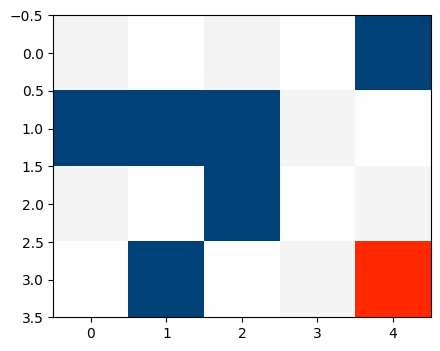


Length of final Q-table = 8
Final Q-table with values from the final route:
          0         1      2         3
(0, 1)  0.0 -0.900000  0.000  0.576784
(0, 2)  0.0 -0.900000  0.000  0.653462
(0, 3)  0.0  0.728704  0.000 -0.900000
(1, 3)  0.0  0.809981 -0.999  0.000000
(2, 3)  0.0  0.000000  0.000  0.899999
(2, 4)  0.0  1.000000  0.000  0.000000
(0, 0)  0.0 -0.999000  0.000  0.254187
(3, 3)  0.0  0.000000  0.000  0.000000

Length of full Q-table = 13
Full Q-table:


,0,1,2,3
start,0.0,-0.900000,0.000,0.485496
obstacle,0.0,0.000000,0.000,0.000000
"(0, 1)",0.0,-0.900000,0.000,0.576784
"(0, 2)",0.0,-0.900000,0.000,0.653462
"(0, 0)",0.0,-0.999000,0.000,0.254187
"(0, 3)",0.0,0.728704,0.000,-0.900000
"(1, 3)",0.0,0.809981,-0.999,0.000000
"(1, 4)",-0.9,0.000000,0.000,0.000000
"(2, 3)",0.0,0.000000,0.000,0.899999
"(3, 3)",0.0,0.000000,0.000,0.000000


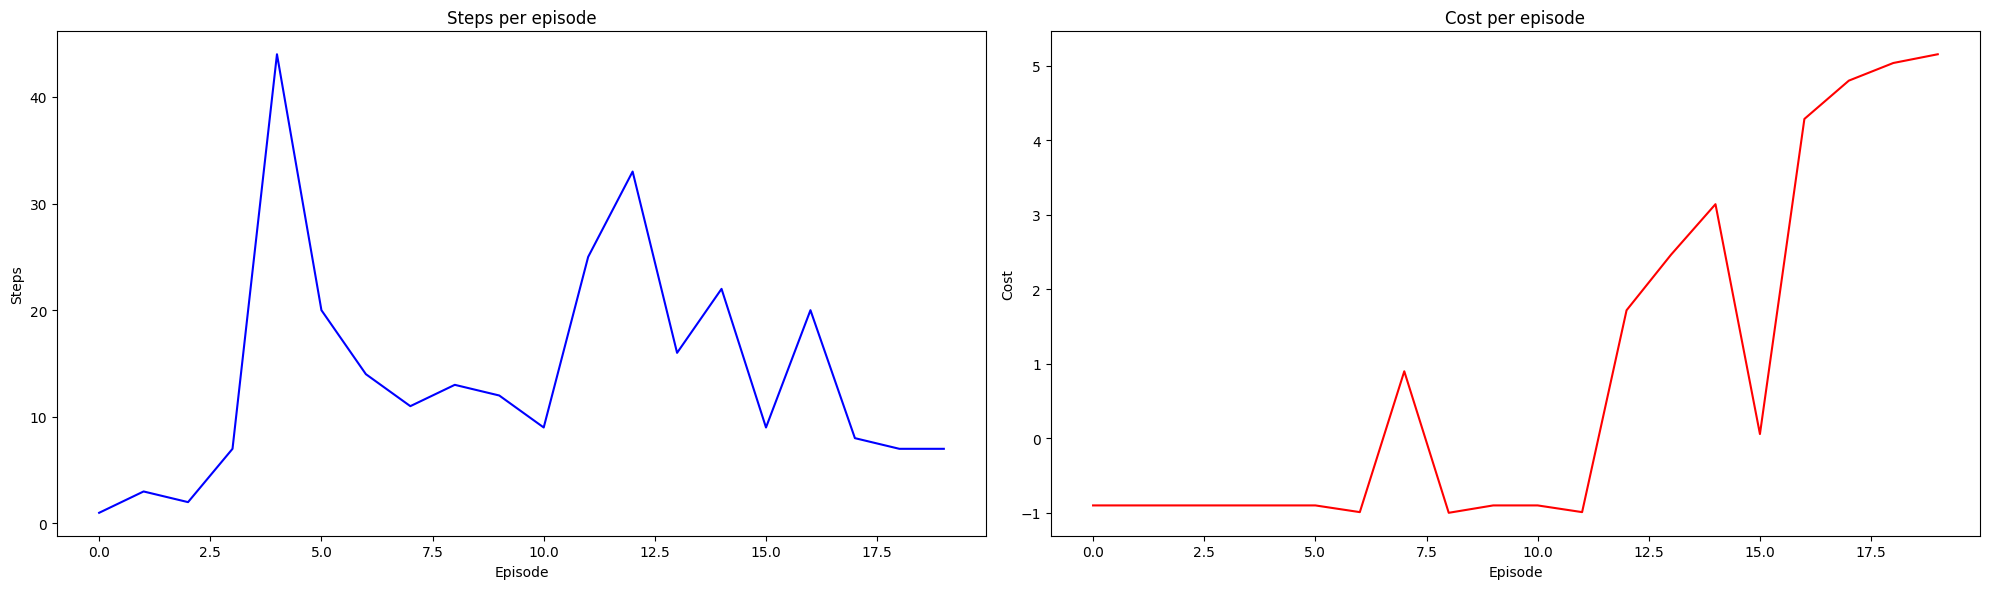

In [17]:

from main_loop import run_example

vis = Visual()
# grid consists of: RxC(tuple), goal(tuple), obstacles(list of tuples)
grid = [(4, 5), (3, 4), [(1, 0), (1, 1), (1, 2), (2, 2), (0, 4), (3, 1)]]
episodes=20
run_example(grid, episodes, vis=vis)
